# Customer Segmentation using KMeans Algorithm

In [1]:
#importing the libraries to be used

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
#reading our data

df = pd.read_csv('C:/Users/Saksham/Desktop/data/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# shape of dataset

print("(rows, columns) :", df.shape)

(rows, columns) : (200, 5)


In [4]:
# datatype of each feature

df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [5]:
# mathematical information related to data

df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
#checking for nan values

df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
# dropping the irrelevent feature i.e Customer ID

df.drop(columns = ['CustomerID'], inplace = True)

In [8]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# Visualization of Dataset

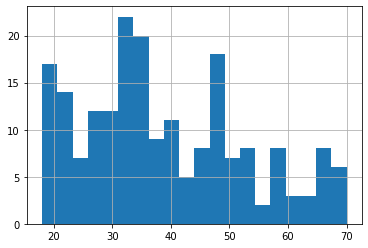

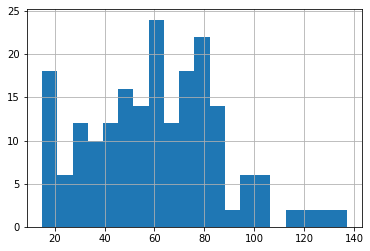

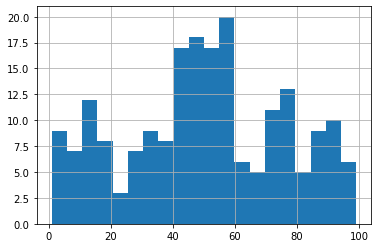

In [9]:
# visualizing the distribution

for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    df[x].hist(bins = 20)
    plt.show()
    
# Observation : most of the customers have age in the range 18 - 20 and 30 - 35 years

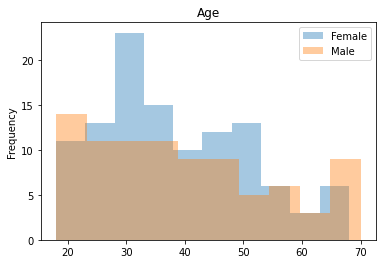

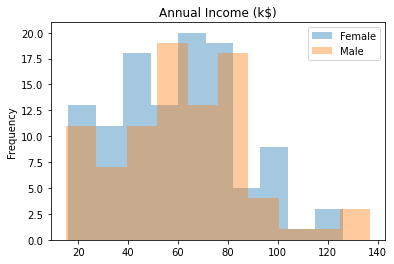

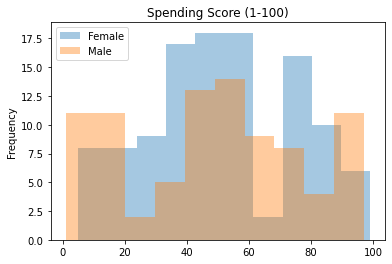

In [10]:
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    df.groupby('Gender')[x].plot.hist(alpha = 0.4, legend = True)
    plt.title(x)
    plt.show()
    
# Observation : Women tend to get higher spending score as compared to men
#             : Women of age 30 - 35 are most frequent customers

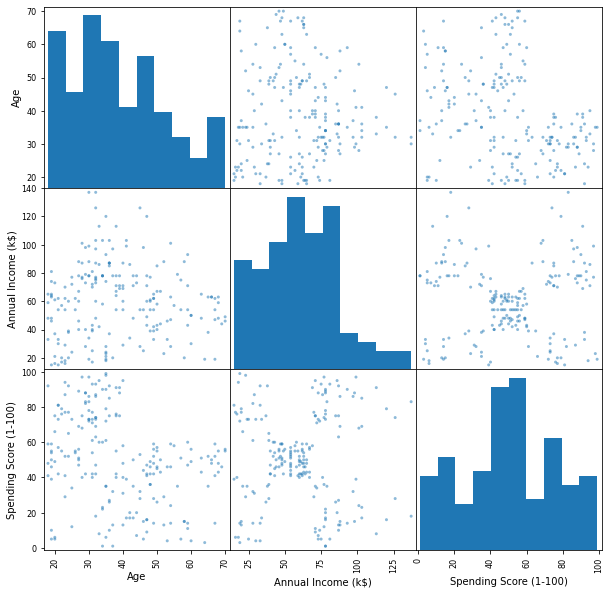

In [11]:
# trying out the relationship between features using scatter_matrix

from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(10,10))
plt.show()

# Observation : Younger customers have higher spending score compared to older ones


# Building KMeans Model 


C:\Users\Saksham\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


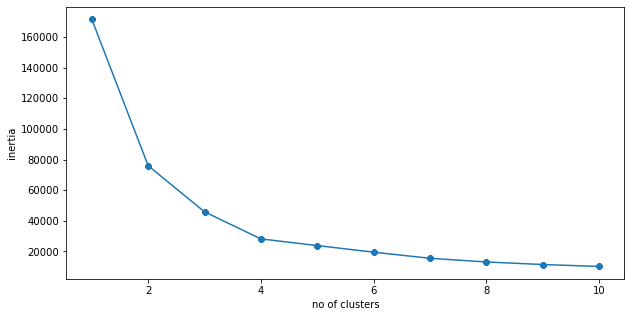

In [12]:
# determing the optimum value of no of cluster points by plotting elbow curve for (spending score vs age)

X1 = df.loc[:, ['Age', 'Spending Score (1-100)']].values
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X1)
    inertia.append(kmeans.inertia_)
plt.figure(figsize = (10,5))
plt.plot(range(1,11,1), inertia, marker = '8')
plt.xlabel('no of clusters')
plt.ylabel('inertia')
plt.show()

# Observation : Optimum value for number of cluster is 4

In [13]:
# building kmeans model and training it with n_clusters = 4

kmeans = KMeans(n_clusters = 4)
kmeans.fit(X1)
labels = kmeans.labels_
labels

array([2, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 2, 3, 1, 2, 1,
       3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 0, 2,
       3, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 0, 1, 3, 1, 3, 1,
       2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [14]:
# cluster centers
centroid = kmeans.cluster_centers_
print(centroid)

[[55.70833333 48.22916667]
 [30.1754386  82.35087719]
 [27.61702128 49.14893617]
 [43.29166667 15.02083333]]


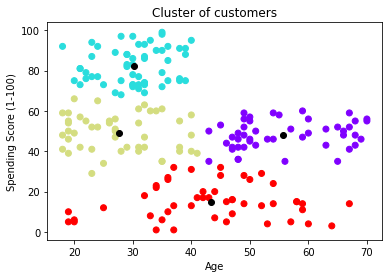

In [15]:
# visualizing our clusters

plt.scatter(X1[:, 0], X1[:, 1], c = labels, cmap = 'rainbow')
plt.scatter(centroid[:, 0], centroid[:, 1], color = 'black')
plt.title('Cluster of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

C:\Users\Saksham\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


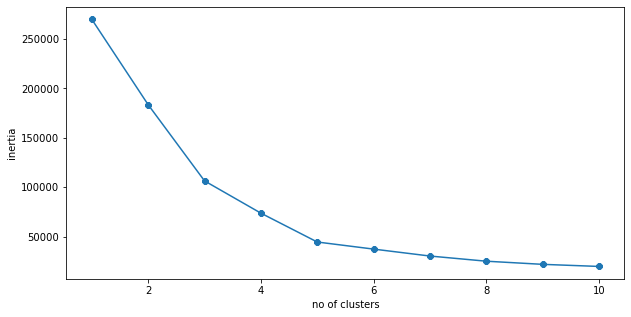

In [16]:
# determing the optimum value of no of cluster points by plotting elbow curve for (spending score vs annual income)

X1 = df.loc[:, ['Annual Income (k$)', 'Spending Score (1-100)']].values
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X1)
    inertia.append(kmeans.inertia_)
plt.figure(figsize = (10,5))
plt.plot(range(1,11,1), inertia, marker = '8')
plt.xlabel('no of clusters')
plt.ylabel('inertia')
plt.show()

# Observation : Optimum value for number of cluster is 5

In [17]:
# building kmeans model and training it with n_clusters = 5

kmeans = KMeans(n_clusters = 5)
kmeans.fit(X1)
labels = kmeans.labels_
labels

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1,
       3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [18]:
# cluster centers
centroid = kmeans.cluster_centers_
print(centroid)

[[86.53846154 82.12820513]
 [55.2962963  49.51851852]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]]


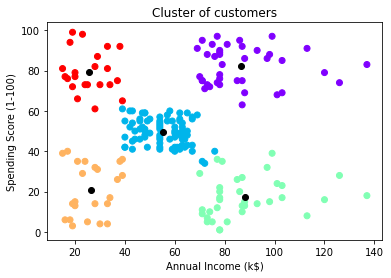

In [19]:
# visualizing our clusters

plt.scatter(X1[:, 0], X1[:, 1], c = labels, cmap = 'rainbow')
plt.scatter(centroid[:, 0], centroid[:, 1], color = 'black')
plt.title('Cluster of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()